In [1]:
import pandas as pd
#import scrapy
import requests
from bs4 import BeautifulSoup
#import html5lib
import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np



#pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 500)


#cant pull data from https://www.businessofapps.com
#cant pull data from https://www.investing.com
#able to pull from https://mobilemarketingreads.com
# can try https://datareportal.com

## Twitter Data

Miscellaneous Information:
Launch Date March 21, 2006

In [2]:
## get the response in the form of html
#twitterurl1="https://en.wikipedia.org/wiki/Twitter,_Inc."
#response=requests.get(twitterurl1)
## print(response.status_code)
#twittersoup1 = BeautifulSoup(response.text, 'html.parser')
#twitterfinances=twittersoup1.find('table',{'class':"wikitable"})
#twitterdf1=pd.read_html(str(twitterfinances))
## convert list to dataframe
#twitterdf1=pd.DataFrame(twitterdf1[0])
#print(twitterdf1)

https://financesonline.com/number-of-twitter-users/

## Instagram Data

Miscellaneous Information:
Launch Date October 6, 2010

In [3]:
##pull data from mobilemarketingreads.com
#instagramurl1 = 'https://mobilemarketingreads.com/instagram-revenue-and-usage-statistics-2020/'
#response=requests.get(instagramurl1)
##print(response.status_code)
##use beautifulsoup to pull the table data from the website
##first the number of cative users, then the next table, annual revenue
#instasoup1 = BeautifulSoup(response.text, 'html.parser')
#insta1 = instasoup1.find('figure', {'class':"wp-block-table"})
#instadf1=pd.read_html(str(insta1))
##number of active users
#instadf1=pd.DataFrame(instadf1[0])
#print(instadf1)
#insta2 = instasoup1.find_all('figure', {'class':"wp-block-table"})[-1]
#instadf2 = pd.read_html(str(insta2))
##instagram annual revenue
#instadf2 = pd.DataFrame(instadf2[0])
#print(instadf2)

## LinkedIn Data

Miscellaneous Information:
Launch Date May 5, 2003

In [4]:
#linkedinurl1 = 'https://mobilemarketingreads.com/linkedin-revenue-and-user-statistics/'
#response=requests.get(linkedinurl1)
#print(response.status_code)

In [5]:
#linkedsoup1 = BeautifulSoup(response.text, 'html.parser')
#linkedin = linkedsoup1.find('figure',{'class':"bChart"})

In [6]:
#linkedindf1=pd.read_html(str(linkedin))
    #number of active users
#linkedindf1 = pd.DataFrame(linkedindf1[0])
#print(linkedindf1)

^this doesnt work since we cant pull from pictures mobilemarketingreads.com

## TikTok Data

Miscellaneous Information:
Launch Date September 2016

In [7]:
##pull data from mobilmarketingreads.com
#tiktokurl1 = 'https://mobilemarketingreads.com/tiktok-revenue-and-usage-statistics-2020/'
#response=requests.get(tiktokurl1)
##print(response.status_code)
#
##pull the data from the table on the website to find the number of active users
#tiktoksoup1 = BeautifulSoup(response.text, 'html.parser')
#tiktok = tiktoksoup1.find_all('figure',{'class':"wp-block-table"})[-1]
#tiktokdf1 = pd.read_html(str(tiktok))
#tiktokdf1 = pd.DataFrame(tiktokdf1[0])
#print(tiktokdf1)

## Facebook

Miscellaneous Information:
Launch Date February 4, 2004
https://financesonline.com/facebook-statistics/#financial
https://investor.fb.com/financials/default.aspx

In [8]:
#facebookurl1 = 'https://www.investing.com/academy/statistics/facebook-meta-facts/'
#response=requests.get(facebookurl1)
##print(response.status_code)
#facebooksoup1 = BeautifulSoup(response.text, 'html.parser')
#facebook=facebooksoup1.find('figure',{'class':"wp-block-table"})
#facebookdf1 = pd.read_html(str(facebook))
#facebookdf1 = pd.DataFrame(facebookdf1[0])
#print(facebookdf1.head())

## Twitter, TikTok, LinkedIn, Instagram Trend Data

https://trends.google.com

I decided to use proxy data, per mentor, since certain data was not free/available to me
I found that keeping facebook will push many trends to below 1, so it was decided to remove this data from the trends since it will skew the data too far

### Trends in Maryland only 2004-2020

In [9]:
#pull data for suicide trends in maryland

suicidetrendsmd = pd.read_csv(r'C:\Users\vtole\Springboard\Springboard\Capstone-2-Springboard\multiTimelineMaryland.csv', skiprows=2)
suicidetrendsmd = pd.DataFrame(suicidetrendsmd)
#rename the columns
suicidetrendsmd.columns.values[1:5] =["Twitter", "LinkedIn", "TikTok", "Instagram" ]
print(suicidetrendsmd.head())

     Month Twitter LinkedIn TikTok Instagram
0  2004-01       1        2      0         0
1  2004-02       0        0      0         1
2  2004-03       0        4      0         0
3  2004-04       0        0      0         0
4  2004-05       0        0      0         0


In [10]:
#change the values under each column into integers
suicidetrendsmd['Twitter'] = suicidetrendsmd['Twitter'].replace('<1', '0').astype(int)
suicidetrendsmd['LinkedIn'] = suicidetrendsmd['LinkedIn'].replace('<1', '0').astype(int)
suicidetrendsmd['TikTok'] = suicidetrendsmd['TikTok'].replace('<1', '0').astype(int)
suicidetrendsmd['Instagram'] = suicidetrendsmd['Instagram'].replace('<1', '0').astype(int)
print(suicidetrendsmd.head(200))

#change the month column to datetime values
suicidetrendsmd['Month'] = pd.to_datetime(suicidetrendsmd['Month'])

suicidetrendsmd.dtypes

       Month  Twitter  LinkedIn  TikTok  Instagram
0    2004-01        1         2       0          0
1    2004-02        0         0       0          1
2    2004-03        0         4       0          0
3    2004-04        0         0       0          0
4    2004-05        0         0       0          0
5    2004-06        0         0       0          0
6    2004-07        0         1       0          0
7    2004-08        0         0       0          0
8    2004-09        0         0       0          0
9    2004-10        0         0       0          0
10   2004-11        0         0       0          0
11   2004-12        0         0       0          0
12   2005-01        0         1       0          1
13   2005-02        0         0       0          0
14   2005-03        0         0       0          0
15   2005-04        0         0       0          1
16   2005-05        0         1       0          0
17   2005-06        0         0       0          0
18   2005-07        1         0

Month        datetime64[ns]
Twitter               int32
LinkedIn              int32
TikTok                int32
Instagram             int32
dtype: object

### Trends in California only 2004-2020

In [11]:
#pull data for suicide trends in california
suicidetrendsca = pd.read_csv(r'C:\Users\vtole\Springboard\Springboard\Capstone-2-Springboard\multiTimelineCalifornia.csv', skiprows=2)
suicidetrendsca = pd.DataFrame(suicidetrendsca)
#rename the columns
suicidetrendsca.columns.values[1:5] =["Twitter", "LinkedIn", "TikTok", "Instagram" ]




In [12]:
#change values to integers for each column
suicidetrendsca['Twitter'] = suicidetrendsca['Twitter'].replace('<1', '0').astype(int)
suicidetrendsca['LinkedIn'] = suicidetrendsca['LinkedIn'].replace('<1', '0').astype(int)
suicidetrendsca['TikTok'] = suicidetrendsca['TikTok'].replace('<1', '0').astype(int)
suicidetrendsca['Instagram'] = suicidetrendsca['Instagram'].replace('<1', '0').astype(int)

#change the month column to datetime values
suicidetrendsca['Month'] = pd.to_datetime(suicidetrendsca['Month'])

print(suicidetrendsca.head(200))
suicidetrendsca.dtypes

         Month  Twitter  LinkedIn  TikTok  Instagram
0   2004-01-01        0         1       0          0
1   2004-02-01        0         0       0          0
2   2004-03-01        0         0       1          1
3   2004-04-01        0         0       0          0
4   2004-05-01        0         0       0          0
5   2004-06-01        0         0       0          0
6   2004-07-01        0         0       0          0
7   2004-08-01        0         0       0          0
8   2004-09-01        0         0       0          0
9   2004-10-01        0         0       0          0
10  2004-11-01        0         0       0          0
11  2004-12-01        0         0       0          0
12  2005-01-01        0         0       0          0
13  2005-02-01        0         0       0          0
14  2005-03-01        0         0       0          0
15  2005-04-01        0         0       0          0
16  2005-05-01        0         0       0          0
17  2005-06-01        0         0       0     

Month        datetime64[ns]
Twitter               int32
LinkedIn              int32
TikTok                int32
Instagram             int32
dtype: object

### Trends in the entire United States only 2004-2020

In [13]:
#pull data about suicide trends in the entire usa
suicidetrendsusa = pd.read_csv(r'C:\Users\vtole\Springboard\Springboard\Capstone-2-Springboard\multiTimelineUSA.csv', skiprows=2)
suicidetrendsusa = pd.DataFrame(suicidetrendsusa)
#rename the columns 
suicidetrendsusa.columns.values[1:5] =["Twitter", "LinkedIn", "TikTok", "Instagram" ]
#change the month column to datetime values
suicidetrendsusa['Month'] = pd.to_datetime(suicidetrendsusa['Month'])
suicidetrendsusa.dtypes

Month        datetime64[ns]
Twitter              object
LinkedIn             object
TikTok               object
Instagram            object
dtype: object

In [14]:
suicidetrendsusa['Twitter'] = suicidetrendsusa['Twitter'].replace('<1', '0').astype(int)
suicidetrendsusa['LinkedIn'] = suicidetrendsusa['LinkedIn'].replace('<1', '0').astype(int)
suicidetrendsusa['TikTok'] = suicidetrendsusa['TikTok'].replace('<1', '0').astype(int)
suicidetrendsusa['Instagram'] = suicidetrendsusa['Instagram'].replace('<1', '0').astype(int)
print(suicidetrendsusa.head(200))
suicidetrendsusa.dtypes

         Month  Twitter  LinkedIn  TikTok  Instagram
0   2004-01-01        0         0       0          0
1   2004-02-01        0         0       0          0
2   2004-03-01        0         0       0          0
3   2004-04-01        0         0       0          0
4   2004-05-01        0         0       0          0
5   2004-06-01        0         0       0          0
6   2004-07-01        0         0       0          0
7   2004-08-01        0         0       0          0
8   2004-09-01        0         0       0          0
9   2004-10-01        0         0       0          0
10  2004-11-01        0         0       0          0
11  2004-12-01        0         0       0          0
12  2005-01-01        0         0       0          0
13  2005-02-01        0         0       0          0
14  2005-03-01        0         0       0          0
15  2005-04-01        0         0       0          0
16  2005-05-01        0         0       0          0
17  2005-06-01        0         0       0     

Month        datetime64[ns]
Twitter               int32
LinkedIn              int32
TikTok                int32
Instagram             int32
dtype: object

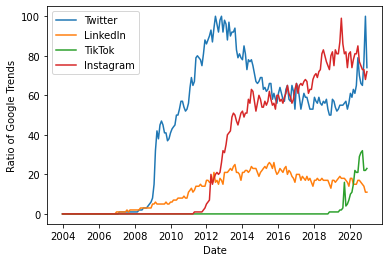

In [15]:
plt.plot(suicidetrendsusa['Month'], suicidetrendsusa['Twitter'], label='Twitter')
plt.plot(suicidetrendsusa['Month'], suicidetrendsusa['LinkedIn'], label='LinkedIn')
plt.plot(suicidetrendsusa['Month'], suicidetrendsusa['TikTok'], label='TikTok')
plt.plot(suicidetrendsusa['Month'], suicidetrendsusa['Instagram'], label='Instagram')
plt.xlabel('Date')
plt.ylabel('Ratio of Google Trends')
plt.legend()

plt.show()


## Suicide Data

Miscellaneous Information:
Start Date of Data

In [16]:
#table ripped from https://save.org/wp-content/uploads/2022/01/StateNumberOfSui1990to2020TABLE.pdf
#copied, pasted onto GoogleSheets
#used " =SPLIT(A1, " ") " to split the data
#cleaned specific rows where columns did not match up
#exported GoogleSheet into .csv, saved into Capstone 2 
suicidebyyearstate = pd.read_csv(r'C:\Users\vtole\Springboard\Springboard\Capstone-2-Springboard\Number of Suicides Per Year Per State.csv')
suicidebyyearstate = pd.DataFrame(suicidebyyearstate)
print(suicidebyyearstate.head())

  State / Region  1990  1991  1992  1993  1994  1995  1996  1997  1998  ...  \
0        Alabama   514   539   523   551   532   563   513   512   569  ...   
1         Alaska    70    73    90    97   121   103   120   128   129  ...   
2        Arizona   686   662   653   727   767   805   726   757   804  ...   
3       Arkansas   293   283   293   317   364   360   323   356   344  ...   
4     California  3708  3716  3723  3875  3712  3694  3408  3430  3415  ...   

   2011  2012  2013  2014  2015  2016  2017  2018    2019  2020  
0   654   724   721   715   750   788   836   823   804.0   793  
1   143   168   171   167   201   193   200   184   210.0   204  
2  1160  1156  1163  1244  1276  1271  1327  1438  1419.0  1363  
3   462   485   516   515   577   555   631   554   548.0   583  
4  3996  3893  4025  4214  4167  4294  4312  4491  4436.0  4144  

[5 rows x 32 columns]


https://save.org/about-suicide/suicide-statistics/

https://wisqars.cdc.gov/data/explore-data/explore/selected-years?ex=eyJ0YmkiOlsiMCJdLCJpbnRlbnRzIjpbIjIiXSwibWVjaHMiOlsiMjA4MTAiXSwic3RhdGUiOlsiMDEiLCIwMiIsIjA0IiwiMDUiLCIwNiIsIjA4IiwiMDkiLCIxMCIsIjExIiwiMTIiLCIxMyIsIjE1IiwiMTYiLCIxNyIsIjE4IiwiMTkiLCIyMCIsIjIxIiwiMjIiLCIyMyIsIjI0IiwiMjUiLCIyNiIsIjI3IiwiMjgiLCIyOSIsIjMwIiwiMzEiLCIzMiIsIjMzIiwiMzQiLCIzNSIsIjM2IiwiMzciLCIzOCIsIjM5IiwiNDAiLCI0MSIsIjQyIiwiNDQiLCI0NSIsIjQ2IiwiNDciLCI0OCIsIjQ5IiwiNTAiLCI1MSIsIjUzIiwiNTQiLCI1NSIsIjU2Il0sInJhY2UiOlsiMSIsIjIiLCIzIiwiNCJdLCJldGhuaWN0eSI6WyIxIiwiMiIsIjMiXSwibWV0cm8iOlsiMSIsIjIiXSwic2V4IjpbIjEiLCIyIl0sImFnZUdyb3Vwc01pbiI6WyIwMC0wNCJdLCJhZ2VHcm91cHNNYXgiOlsiMTk5Il0sImN1c3RvbUFnZXNNaW4iOlsiMCJdLCJjdXN0b21BZ2VzTWF4IjpbIjE5OSJdLCJmcm9tWWVhciI6WyIyMDAxIl0sInRvWWVhciI6WyIyMDIwIl0sImFnZWJ1dHRuIjoiNVlyIiwiZ3JvdXBieTEiOiJBR0VHUCIsInlwbGxBZ2VzIjpbIjY1Il19

https://catalog.data.gov/dataset/ship-suicide-rate-2009-2017
### Maryland Suicide Data with race/ethnicity statistics per 100,000, 2007-2017

In [17]:
#pull suicide data for maryland
suicidemaryland = pd.read_csv(r'C:\Users\vtole\Springboard\Springboard\Capstone-2-Springboard\SHIP_Suicide_Rate_2009-2017.csv')
suicidemaryland = pd.DataFrame(suicidemaryland)

#fill NaN with 0
suicidemaryland['Value'] = suicidemaryland['Value'].replace(np.nan, 0)

#drop strata and geography columns
suicidemaryland = suicidemaryland.drop(suicidemaryland.columns[4], axis=1)

#drop all rows regarding race/ethnicity, keeping all race info
suicidemaryland = suicidemaryland[suicidemaryland['Race/ ethnicity'] == 'All races/ethnicities (aggregated)']


#drop race/ethnicity column after you use it to get all race info
suicidemaryland = suicidemaryland.drop(suicidemaryland.columns[2], axis=1)

#pull only state jurisdiction rows
#DO I WANT TO DO THIS OR DO I WANT TO KEEP ALL AREAS OF MARYLAND???????????????????
#suicidemaryland = suicidemaryland[suicidemaryland['Jurisdiction'] == 'State']

print(suicidemaryland.head())

       Jurisdiction  Value       Year
0             State    9.3  2015-2017
1          Allegany    0.0  2015-2017
2      Anne Arundel   12.1  2015-2017
3    Baltimore City    8.2  2015-2017
4  Baltimore County    9.7  2015-2017


In [18]:
#Change the year statistics to single int

#change the value column name to Deaths per 100,000

#pull only state jurisdiction rows

print(suicidemaryland)

          Jurisdiction  Value       Year
0                State    9.3  2015-2017
1             Allegany    0.0  2015-2017
2         Anne Arundel   12.1  2015-2017
3       Baltimore City    8.2  2015-2017
4     Baltimore County    9.7  2015-2017
5              Calvert    0.0  2015-2017
6             Caroline    0.0  2015-2017
7              Carroll   13.1  2015-2017
8                Cecil    0.0  2015-2017
9              Charles    0.0  2015-2017
10          Dorchester    0.0  2015-2017
11           Frederick   10.3  2015-2017
12             Garrett    0.0  2015-2017
13             Harford   10.7  2015-2017
14              Howard    8.0  2015-2017
15                Kent    0.0  2015-2017
16          Montgomery    6.8  2015-2017
17     Prince George's    5.7  2015-2017
18        Queen Anne's    0.0  2015-2017
19        Saint Mary's    0.0  2015-2017
20            Somerset    0.0  2015-2017
21              Talbot    0.0  2015-2017
22          Washington   15.4  2015-2017
23            Wi

In [19]:
suicidemaryland.dtypes

Jurisdiction     object
Value           float64
Year             object
dtype: object

### Caliornia Suicide Data, per 100k, 2000-2017

https://catalog.data.gov/dataset/suicide-deaths-per-100000-population-lghc-indicator-8d7bb

In [20]:
#pull suicide data from california

suicidecalifornia = pd.read_csv(r'C:\Users\vtole\Springboard\Springboard\Capstone-2-Springboard\suicide-lghc-indicator-21.csv')
suicidecalifornia = pd.DataFrame(suicidecalifornia)

#rename Rate to Deaths Per 100k 
suicidecalifornia.rename(columns={'Rate': 'Deaths Per 100,000'}, inplace=True)

#drop irrelevant county info and keep full state statistics
suicidecalifornia.drop(suicidecalifornia.tail(1350).index, inplace = True)

#drop age adjusted rate column
#drop numerator and denominator colums
#drop strata and geography columns
suicidecalifornia = suicidecalifornia.drop(suicidecalifornia.columns[[0, 1, 3, 5, 6, 8]], axis=1)

#make Year into datetime
suicidecalifornia['Year'] = pd.to_datetime(suicidecalifornia['Year'])


print(suicidecalifornia.head(60))
suicidecalifornia.dtypes


         Year Strata Name  Deaths Per 100,000
0  2000-01-01      Female               3.993
1  2000-01-01        Male              14.370
2  2000-01-01       Total               9.156
3  2001-01-01      Female               3.950
4  2001-01-01        Male              14.970
5  2001-01-01       Total               9.434
6  2002-01-01      Female               4.045
7  2002-01-01        Male              14.380
8  2002-01-01       Total               9.188
9  2003-01-01      Female               4.122
10 2003-01-01        Male              15.130
11 2003-01-01       Total               9.596
12 2004-01-01      Female               4.569
13 2004-01-01        Male              14.300
14 2004-01-01       Total               9.409
15 2005-01-01      Female               3.986
16 2005-01-01        Male              13.400
17 2005-01-01       Total               8.673
18 2006-01-01      Female               4.023
19 2006-01-01        Male              13.900
20 2006-01-01       Total         

Year                  datetime64[ns]
Strata Name                   object
Deaths Per 100,000           float64
dtype: object

In [21]:
#pull every 3rd row starting from row 3
californiatotal = suicidecalifornia.iloc[2::3]
print(californiatotal.head(60))

         Year Strata Name  Deaths Per 100,000
2  2000-01-01       Total               9.156
5  2001-01-01       Total               9.434
8  2002-01-01       Total               9.188
11 2003-01-01       Total               9.596
14 2004-01-01       Total               9.409
17 2005-01-01       Total               8.673
20 2006-01-01       Total               8.936
23 2007-01-01       Total               9.534
26 2008-01-01       Total              10.010
29 2009-01-01       Total              10.080
32 2010-01-01       Total              10.190
35 2011-01-01       Total              10.460
38 2012-01-01       Total              10.050
41 2013-01-01       Total              10.200
44 2014-01-01       Total              10.670
47 2015-01-01       Total              10.540
50 2016-01-01       Total              10.700
53 2017-01-01       Total              10.660


In [22]:
#pull every 3rd row starting from row 2
californiamale = suicidecalifornia.iloc[1::3]
print(californiamale.head(60))

         Year Strata Name  Deaths Per 100,000
1  2000-01-01        Male               14.37
4  2001-01-01        Male               14.97
7  2002-01-01        Male               14.38
10 2003-01-01        Male               15.13
13 2004-01-01        Male               14.30
16 2005-01-01        Male               13.40
19 2006-01-01        Male               13.90
22 2007-01-01        Male               14.71
25 2008-01-01        Male               15.47
28 2009-01-01        Male               15.44
31 2010-01-01        Male               15.88
34 2011-01-01        Male               15.99
37 2012-01-01        Male               15.83
40 2013-01-01        Male               15.72
43 2014-01-01        Male               16.44
46 2015-01-01        Male               16.07
49 2016-01-01        Male               16.46
52 2017-01-01        Male               16.68


In [23]:
#pull every 3rd row starting from row 1
californiafemale = suicidecalifornia.iloc[::3]
print(californiafemale.head(60))

         Year Strata Name  Deaths Per 100,000
0  2000-01-01      Female               3.993
3  2001-01-01      Female               3.950
6  2002-01-01      Female               4.045
9  2003-01-01      Female               4.122
12 2004-01-01      Female               4.569
15 2005-01-01      Female               3.986
18 2006-01-01      Female               4.023
21 2007-01-01      Female               4.409
24 2008-01-01      Female               4.610
27 2009-01-01      Female               4.776
30 2010-01-01      Female               4.565
33 2011-01-01      Female               4.984
36 2012-01-01      Female               4.340
39 2013-01-01      Female               4.749
42 2014-01-01      Female               4.957
45 2015-01-01      Female               5.065
48 2016-01-01      Female               5.002
51 2017-01-01      Female               4.681


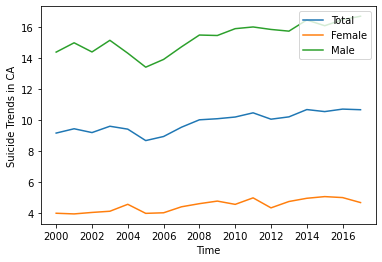

In [24]:
plt.plot(californiatotal['Year'], californiatotal['Deaths Per 100,000'], label='Total')
plt.plot(californiafemale['Year'], californiafemale['Deaths Per 100,000'], label='Female')
plt.plot(californiamale['Year'], californiamale['Deaths Per 100,000'], label='Male')
plt.xlabel('Time')
plt.ylabel('Suicide Trends in CA')
plt.legend()
plt.show()

https://catalog.data.gov/dataset/death-rates-for-suicide-by-sex-race-hispanic-origin-and-age-united-states
### United States Suicide Data, per 100k, 1950-2018

In [25]:
suicideusa = pd.read_csv(r'C:\Users\vtole\Springboard\Springboard\Capstone-2-Springboard\Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv')
suicideusa = pd.DataFrame(suicideusa)
print(suicideusa.head())


                 INDICATOR                                               UNIT  \
0  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   
1  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   
2  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   
3  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   
4  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   

   UNIT_NUM STUB_NAME  STUB_NAME_NUM   STUB_LABEL  STUB_LABEL_NUM  YEAR  \
0         1     Total              0  All persons             0.0  1950   
1         1     Total              0  All persons             0.0  1960   
2         1     Total              0  All persons             0.0  1970   
3         1     Total              0  All persons             0.0  1980   
4         1     Total              0  All persons             0.0  1981   

   YEAR_NUM       AGE  AGE_NUM  ESTIMATE FLAG  
0         1  A